The Canonical Ensemble
======================

Most physical systems are not isolated, but exchange energy with the
environment. Since the system is very small compared to the environment,
we consider that the environment acts effectively as a heat reservoir or
heat bath at a fixed temperature $T$. If a small system is put in
thermal contact with the heat bath, it will reach thermal equilibrium
exchanging energy until the system attains the temperature of the bath.

Imagine an infinitely large number of independent copies of the system and
the heat bath. The probability $P_s$ that the system is found in a
microstate $s$ with energy $E_s$ is given by:
$$P_s=\frac{1}{Z}e^{-E_s/k_BT},
$$ where $Z$ is the normalization constant. This
corresponds to the canonical ensemble. Since $\sum P_s = 1$, we have
$$Z=\sum_s{e^{-E_s/k_BT}},
$$ where the sum is over all the possible microstates of the
system. This equation defines the “partition function” of the system.

We can use $P_s$ to obtain the ensemble average of physical
quantities of interest. For instance, the mean energy is given by:
$$\langle E \rangle = \sum_s E_s\, P_s=\frac{1}{Z}\sum_s{E_s\,e^{-\beta
E_s}},$$ with $\beta=1/k_BT$.

The Metropolis algorithm
------------------------

We want to obtain an estimate for the mean value of an observable $A$:
$$\langle A \rangle = \sum_s A_s e^{-\beta E_s}/\sum_s e^{-\beta E_s},$$
where $E_s$ and $A_s$ are the values of the energy and the quantity $A$
in the configuration $s$. The idea of using Monte Carlo consists in
sampling a subset of configuration and approximating the average by the
mean over the sample:
$$\langle A \rangle \simeq \sum_s^{m} A_s e^{-\beta E_s}/\sum_s^{m}
e^{-\beta E_s},$$ where the sampling is over $m$ configurations.

A crude Monte Carlo procedure is to generate a configuration at random,
calculate $E_s$ and $A_s$, and the contributions of this configuration
to the sums. This is equivalent to the “hit and miss” Monte Carlo method
for evaluating integrals. We have seen that this approach is very
inefficient, because the configurations generated would likely be very
improbable and contribute very little to the sum. Instead, we want to
generate a sample of configurations that are <span>*important*</span>,
<span>*i. e.*</span> have large contributions to the sums. This is
precisely the equivalent to “importance sampling”. Hence, we need to
generate the configurations according to a probability distribution. In
this case, the most convenient one is not other than the Boltzmann
probability itself $P_s$ (\[c\_boltz\]). Since we will average over the
$m$ configurations generated with this probability, we must use the
expression:
$$\langle A \rangle \simeq \sum_s^{m} \frac{A_s}{P_s} e^{-\beta
E_s}/\sum_s^{m} \frac{1}{P_s}e^{-\beta E_s}
= \frac{1}{m}\sum_s^{m}A_s$$

The idea of the Monte Carlo algorithm consists in performing a random
walk over the space of configurations. The walker “hops” from a
configuration $i$ to another $j$ using the “transition probability”
$$W=\min{\left(1,\frac{P_j}{P_i}\right)}.$$ Replacing by the
corresponding expression, we obtain:
$$W=\min{\left(1,e^{-\beta(E_j-E_i)}\right)}.$$

Since we are only interested in the ratio $P_j/P_i$, it is not necessary
to know the normalization constant $Z$. Although we have picked this
expression for the transition probability $W$, is not the only choice.
It can be shown that the only requirement is that $W$ satisfies the
“detailed balance” condition:
$$W(i \rightarrow j)e^{-\beta E_i} = W(j \rightarrow i)e^{-\beta E_j}.$$

Another comon choice in the literature is given by:
$$W(i\rightarrow j)=\frac{1}{e^{-\beta (E_j-E_i)}+1}.$$ Note that if
$\Delta E=0$, then $W=1/2$ and the trial configuration has an equal
probability of being accepted or rejected.

The pseudocode for a Monte Carlo simulation can be outlined as follows:

1.  Establish an initial configuration.

2.  Make a random trial change in the configuration. For example, choose
    a spin at random and try to flip it. Or choose a particle at random
    and attempt to displace it a random distance.

3.  Compute the change in the energy of the system $\Delta E$ due to the
    trial change.

4.  If $\Delta E \leq 0$, accept the new configuration and go to step 8.

5.  If $\Delta E$ is positive, compute the “transition probability”
    $W=e^{-\beta \Delta E}$.

6.  Generate a random number $r$ in the interval $[0,1]$.

7.  If $r \leq W$, accept the new configuration; otherwise retain the
    previous configuration.

8.  Repeat steps (2) to (8) to obtain a sufficient number of
    configurations or “trials”.

9.  Compute averages over configurations which are statistically
    independent of each other.
    
### Important conditions for validity

A Monte Carlo algorithm must satisfy detailed balance, but also **Ergodicity**. This means that the possible moves should guarantee that the system will explore the entire phase space. If there are regions of phase space that are not accessible via local moves, for instance, one should implement global moves or more complex update strategies.

### Exercise CM#.1 (guided+challenge): 
#### Classical gas in 1D 

In this case, we assume that the particles do not interact and 
the particle velocities are continuous and unbounded. The
energy is the sum of the kinetic energies of the individual
particles. Hence, for an ideal gas, the only coordinates of interest are
the velocities. In order to change a configuration, we choose a particle
at random and change its velocity by a random amount according to the corresponding
transition probability. For simplicity we
consider only the one-dimensional case.

1.  Simulate an ideal gas of $N$ particles in 1D. Choose $N=20$, $T=100$
    and 200 MC steps. Give all the particles the same initial velocity
    $v_0=10$. Determine the value of the maximum velocity change
    $\Delta v$ so that the acceptance ratio is approximately $50\%$.
    What is the mean kinetic energy and mean velocity of the particles?

2.  We might expect that the total energy of an ideal gas remains
    constant since the particles do not interact with each other and
    hence they cannot exchange energy directly. What is the initial
    value of the energy of the system? Does it remain constant? If it
    does not, explain how the energy changes. Explain why the measured
    mean particle velocity is zero even though the initial particle
    velocities are not zero.

3.  What is a simple criterion for “thermal equilibrium”? Estimate the
    number of Monte Carlo steps per particle necessary for the system to
    reach thermal equilibrium. What choice of the initial velocities
    allows the system to reach thermal equilibrium at temperature $T$ as
    quickly as possible?

4.  **Challenge**: Compute the mean energy per particle for $T=10$, $100$ and $400$. In
    order to compute the averages after the system has reached thermal
    equilibrium, start measuring only after equilibrium has
    been achieved. Increase the number of Monte Carlo steps until the
    desired averages do not change appreciably. What is the approximate
    number of warmup steps for $N=10$ and $T=100$, and for $N=40$ and
    $T=100$? If the number of warmup steps is different in the two
    cases, explain the reason for this difference.

5.  **Challenge**: Compute the probability $P(E)dE$ for the system of $N$ particles to
    have a total energy between $E$ and $E+dE$. Do you expect $P(E)$ to
    be proportional to $e^{-\beta E}$? Plot $P(E)$ as a function of $E$
    and describe the qualitative behavior of $P(E)$. Does the plot of
    $\ln{(P(E))}$ yield a straight line?
    
6.  **Challenge**: Compute the mean energy for $T=10$, $20$, $30$,... $90$, $100$ and
    $110$ and estimate the heat capacity.

7.  **Challenge**: Compute the mean square energy fluctuations $\langle \Delta E^2
    \rangle = \langle E^2 \rangle - \langle E \rangle ^2$ for $T=10$ and
    $T=40$. Compare the magnitude of the ratio $\langle \Delta E^2
    \rangle/T^2$ with the heat capacity determined in the previous item.



Acceptance ratio=  0.59215
Initial value of the energy =  82.91033344710813
<Energy>= 5.104330805414369
<Energy^2>= 79.68900312678628
Error= 0.051785524114217565
Acceptance ratio=  0.58835
Heat capacity estimate: 0.20401927743515422
<ΔE**2> for T = 10 = 1491903.0770956513
<ΔE**2> for T = 40 is = 819.8721056950773


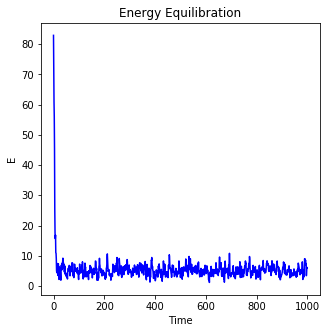

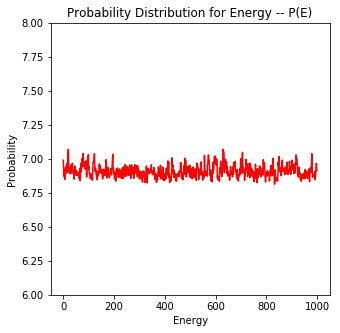

In [5]:
# -*- coding: utf-8 -*-
"""
Created on Tue Apr 21 17:33:46 2020

@author: christos
"""

import numpy as np
from matplotlib import pyplot as plt

nwalkers = 20
v = np.zeros(nwalkers)
v.fill(10)
T = np.array([10,40,100,400])
delta = 5

def metropolis(vold):
    global delta, T
    vtrial = np.random.random()    
    vtrial = vold+(2*vtrial-1)*delta
    weight = np.exp(-(vtrial**2-vold**2)/T[0])
    vnew = vold
    if(weight >= 1): #Accept
        vnew = vtrial
    elif(weight != 0):
        r = np.random.random()
        if(r <= weight): #Accept
            vnew = vtrial
    return vnew

# Warmup loop

Nwarmup = 1000
Ewarmup = np.zeros(Nwarmup)

Naccept = 0.
for j in range(Nwarmup):
    for i in range(nwalkers):
        vold = v[i]
        v[i] = metropolis(v[i])
        if(v[i] != vold):
            Naccept += 1
        
    Ewarmup[j] = np.sum(v**2)/nwalkers

x = np.arange(0,Nwarmup,1)

figure = plt.figure(figsize=(5,5))
K = figure.add_subplot(1,1,1)
K.set_title("Energy Equilibration" )
K.set_xlabel("Time")
K.set_ylabel("E")
K.plot(x,Ewarmup,ls='-',c='blue')



print("Acceptance ratio= ", Naccept/float(Nwarmup*nwalkers))
print("Initial value of the energy = ", Ewarmup[0])
#The initial value of the energy of the system is not constant. It quickly changes as time passes
#Since we gave the particles the same initial velocities, in this 1D if we average over all of them
#it is certain to get zero, since there are no itneractions and the particle so not exchange energy directly



# Measurement loop

Nmeasure = 1000
Naccept = 0.
E = 0.
E2 = 0.
EE = np.zeros(Nmeasure)
for j in range(Nmeasure):
    for i in range(nwalkers):
        vold = v[i]
        v[i] = metropolis(v[i])
        if(v[i] != vold):
            Naccept += 1
            
    EE[j] = np.sum(v**2)/nwalkers
    E += np.sum(v**2)
    E2 += np.sum(v**4)

E = E/Nmeasure/nwalkers
E2 = E2/Nmeasure/nwalkers
print("<Energy>=", E)
print("<Energy^2>=", E2)
print("Error=", np.sqrt((E2-E**2)/Nmeasure/nwalkers))

print("Acceptance ratio= ", Naccept/float(Nmeasure*nwalkers))
 
#Mean Energy for T = 10 is <Energy> = 4.99
#Mean Energy for T = 100 is <Energy> = 49.98
#Mean Energy for T = 400 is <Energy> = 200.94       
#By substituting the temperatures in the metropolis algorithm


#For N = 10 and T = 100 we need Nwarmup = 2000 MC Steps to get within 1%
#For N = 40 and T = 100 we need Nwarmup = 8000 MC Steps to get within 1%
#The discrepancy in the two numbers is due to the increased multiplicity
#tha the walkers can explore

#P(E) = (Omega)*Ps where Ps is the probability distribution given by the 
#canonical ensemble and Omega is the multiplicity or the number of walkers
#with energy E. Therefore P(E) is proportional to exp(-βE)

nsteps  = 100
v_hist  = np.zeros(nsteps*nwalkers)
vx_hist = np.zeros(nsteps*nwalkers)
vy_hist = np.zeros(nsteps*nwalkers)

#At this point we have already warmed up and are very close to equilibrium
# measure the helmholtz free energy in F/k 


j = 0
F = np.zeros(Nmeasure) 
PE = np.zeros(Nmeasure)
k = 1
Z = sum(np.exp(-(EE)/T[1]))

for i in range(Nmeasure):
    F[i] = -T[1]*np.log(np.exp(-(EE[i])/T[1]))
    PE[i] = (1/Z)*np.exp(-F[i]/T[1])


figure1 = plt.figure(figsize=(5,5))
L = figure1.add_subplot(1,1,1)
L.set_title("Probability Distribution for Energy -- P(E)" )
L.set_xlabel("Energy")
L.set_ylabel("Probability")
L.set_ylim(6.,8)

L.plot(range(Nmeasure),-np.log(PE),ls='-',c='red')

#From the plot we see that the natural log of probability distribution for the energy
#yields a straight line within 1%


#To compute the heat capacity we need the average energy at different temps
#We need to redifine the metropolis algorithm to incorporate the different temps
rr = np.random.random()
Temp = np.arange(10,120,10)
def metropolis1(vold):
    global delta,rr
    vtrial = np.zeros(11)
    vnew = np.zeros(11)
    weight = np.zeros(11)
    for i in range(11):
        vtrial[i] = np.random.random()    
        vtrial[i] = vold+(2*vtrial[i]-1)*delta
        weight[i] = np.exp(-(vtrial[i]**2-vold**2)/Temp[i])
        vnew[i] = vold
        if(weight[i] >= 1): #Accept
            vnew[i] = vtrial[i]
        elif(weight[i] != 0):
            rr = np.random.random()
        if(rr <= weight[i]): #Accept
            vnew[i] = vtrial[i]
    return vnew


Eavg = np.zeros(11)
for j in range(11):
    for i in range(11):
        vold = v[i]
        v[i] = metropolis1(v[i])[i]
        if(v[i] != vold):
            Naccept += 1
            
    Eavg[j] = np.sum(v**2)/nwalkers

C = (sum(Eavg)/11)*((sum(Temp)/11)**(-1))
print("Heat capacity estimate:", C)  

# Now we need to calculate <ΔΕ**2>


#For T = 10
Nmeasure = 1000
Naccept = 0.
E_1 = 0.
E2_1 = 0.

def metropolis2(vold):
    global delta, T
    vtrial = np.random.random()    
    vtrial = vold+(2*vtrial-1)*delta
    weight = np.exp(-(vtrial**2-vold**2)/T[0])
    vnew = vold
    if(weight >= 1): #Accept
        vnew = vtrial
    elif(weight != 0):
        r = np.random.random()
        if(r <= weight): #Accept
            vnew = vtrial
    return vnew


for j in range(Nmeasure):
    for i in range(nwalkers):
        vold = v[i]
        v[i] = metropolis2(v[i])
        if(v[i] != vold):
            Naccept += 1
        
    E_1 += np.sum(v**2)
    E2_1 += np.sum(v**4)

E_1 = E_1/Nmeasure/nwalkers
E2 = E2_1/Nmeasure/nwalkers
ΔE2_1 = E2_1-E_1**2
print("<ΔE**2> for T = 10 =", ΔE2_1)

#For T = 40
Nmeasure = 1000
Naccept = 0.
E_2 = 0.
E2_2 = 0.

def metropolis3(vold):
    global delta, T
    vtrial = np.random.random()    
    vtrial = vold+(2*vtrial-1)*delta
    weight = np.exp(-(vtrial**2-vold**2)/T[1])
    vnew = vold
    if(weight >= 1): #Accept
        vnew = vtrial
    elif(weight != 0):
        r = np.random.random()
        if(r <= weight): #Accept
            vnew = vtrial
    return vnew


for j in range(Nmeasure):
    for i in range(nwalkers):
        vold = v[i]
        v[i] = metropolis3(v[i])
        if(v[i] != vold):
            Naccept += 1
        
    E_2 += np.sum(v**2)
    E2_2 += np.sum(v**4)

E_2 = E_2/Nmeasure/nwalkers
E2_2 = E2_2/Nmeasure/nwalkers
ΔE2_2 = E2_2-E_2**2
print("<ΔE**2> for T = 40 is =", ΔE2_2)
